In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import xarray as xr

rc("font", **{"family": "Times"})
rc("text", usetex=True)
plt.rcParams['figure.dpi'] = 300

# version = "no_transform"
# version = "sqrt"
version = "transform_0.1"

# !scp bp:samples_{version}.pt .

test = xr.open_dataset("test.nc").pr.values
samples = torch.load(f"samples_{version}.pt", map_location=torch.device('cpu')).numpy()

test_cells_sorted = torch.load("test_flattened_sorted.pt").numpy()
samples_cells_sorted = np.sort(samples.flatten())

test_frames = test.reshape(-1, 64 * 64)
test_frames_mean = np.mean(test_frames, axis=1)
test_frames_mean_sorted = np.sort(test_frames_mean)
samples_frames = samples.reshape(-1, 64 * 64)
samples_frames_mean = np.mean(samples_frames, axis=1)
samples_frames_mean_sorted = np.sort(samples_frames_mean)

test_videos = test.reshape(-1, 10 * 64 * 64)
test_videos_mean = np.mean(test_videos, axis=1)
test_videos_mean_sorted = np.sort(test_videos_mean)
samples_videos = samples.reshape(-1, 10 * 64 * 64)
samples_videos_mean = np.mean(samples_videos, axis=1)
samples_videos_mean_sorted = np.sort(samples_videos_mean)

print(samples.shape)

(3152, 1, 10, 64, 64)


QQ Plot for Individual Cells:


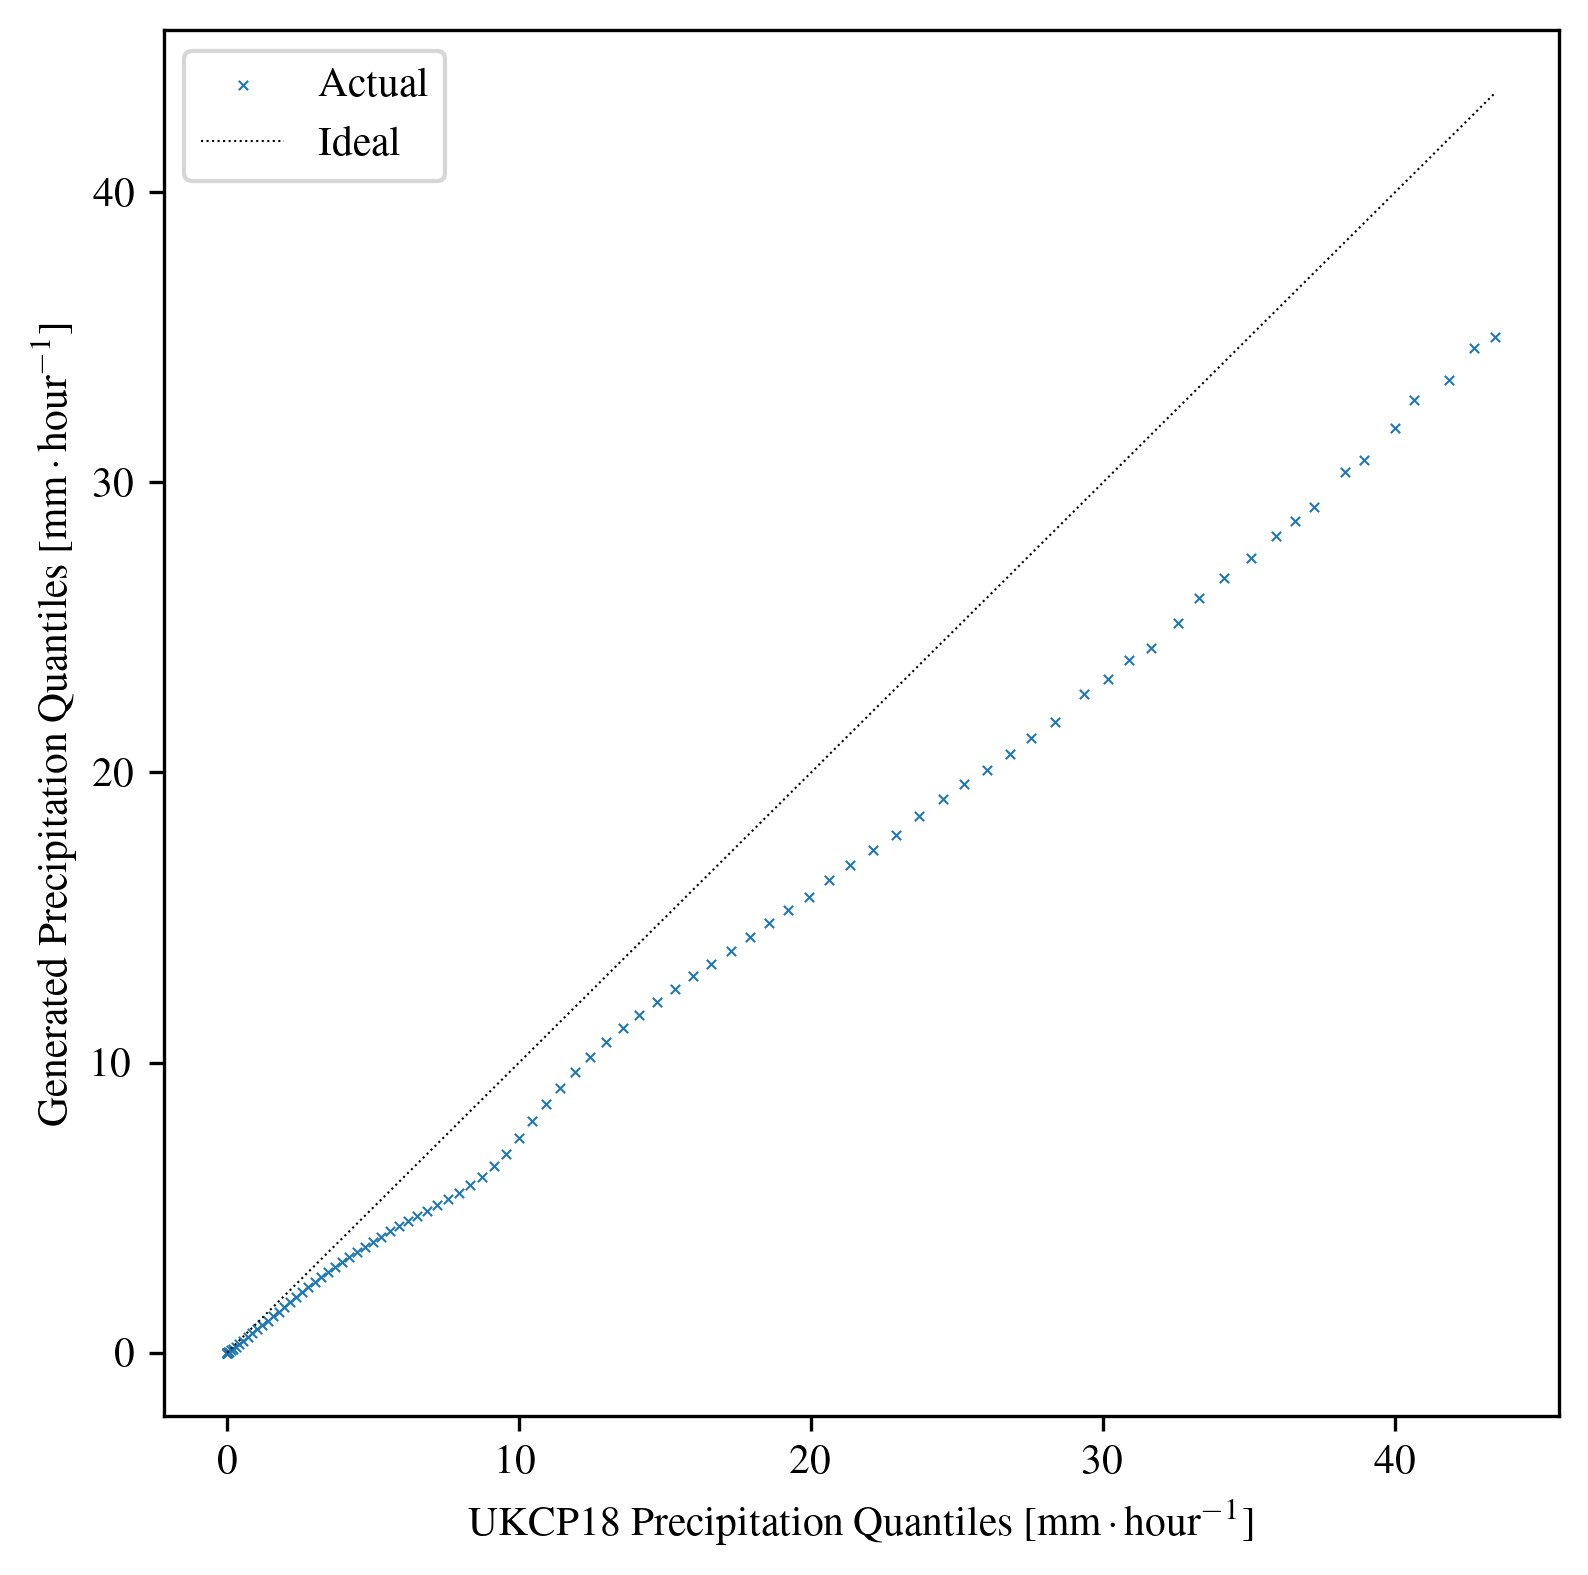

In [2]:
def get_quantiles(sorted_array, desired_quantiles):
    indices = (len(sorted_array) - 1) * desired_quantiles
    indices_floor = np.floor(indices).astype(int)
    indices_ceil = np.ceil(indices).astype(int)

    indices_fractional_part = indices - indices_floor

    quantiles_floor = sorted_array[indices_floor]
    quantiles_ceil = sorted_array[indices_ceil]

    quantiles = quantiles_floor + indices_fractional_part * (quantiles_ceil - quantiles_floor)

    return quantiles

def plot_qq(test_quantiles, samples_quantiles, log = False):
    plt.figure(figsize=(6, 6))
    plt.scatter(test_quantiles, samples_quantiles, marker = 'x', s = 5, linewidth = 0.5, label = "Actual")
    # plt.plot(test_quantiles, samples_quantiles, linewidth = 0.5, label = "Actual")
    plt.plot(test_quantiles, test_quantiles, linewidth = 0.5, linestyle=":", c = "black", label = "Ideal")
    plt.legend()

    plt.xscale('log' if log else 'linear')
    plt.yscale('log' if log else 'linear')
    
    plt.xlabel('UKCP18 Precipitation Quantiles [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
    plt.ylabel('Generated Precipitation Quantiles [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')

    plt.savefig("examples/qq.pdf", bbox_inches='tight', pad_inches=0.02)
    plt.show()

# desired_quantiles = np.concatenate([np.linspace((1 - 10 ** (i + 1)) + (10 ** i), (1-10**i), 9) for i in range(-1, -8, -1)])
desired_quantiles = 1 - np.geomspace(1, 0.0000001, 100)
# desired_quantiles = 1 - np.geomspace(1, 0.1, 100)
# print(desired_quantiles)

test_cells_quantiles = get_quantiles(test_cells_sorted, desired_quantiles)
samples_cells_quantiles = get_quantiles(samples_cells_sorted, desired_quantiles)

test_frames_quantiles = get_quantiles(test_frames_mean_sorted, desired_quantiles)
samples_frames_quantiles = get_quantiles(samples_frames_mean_sorted, desired_quantiles)

test_videos_quantiles = get_quantiles(test_videos_mean_sorted, desired_quantiles)
samples_videos_quantiles = get_quantiles(samples_videos_mean_sorted, desired_quantiles)

print("QQ Plot for Individual Cells:")
plot_qq(test_cells_quantiles, samples_cells_quantiles)
# print("QQ Plot for Frame Averages:")
# plot_qq(test_frames_quantiles, samples_frames_quantiles)
# print("QQ Plot for Video Averages:")
# plot_qq(test_videos_quantiles, samples_videos_quantiles)

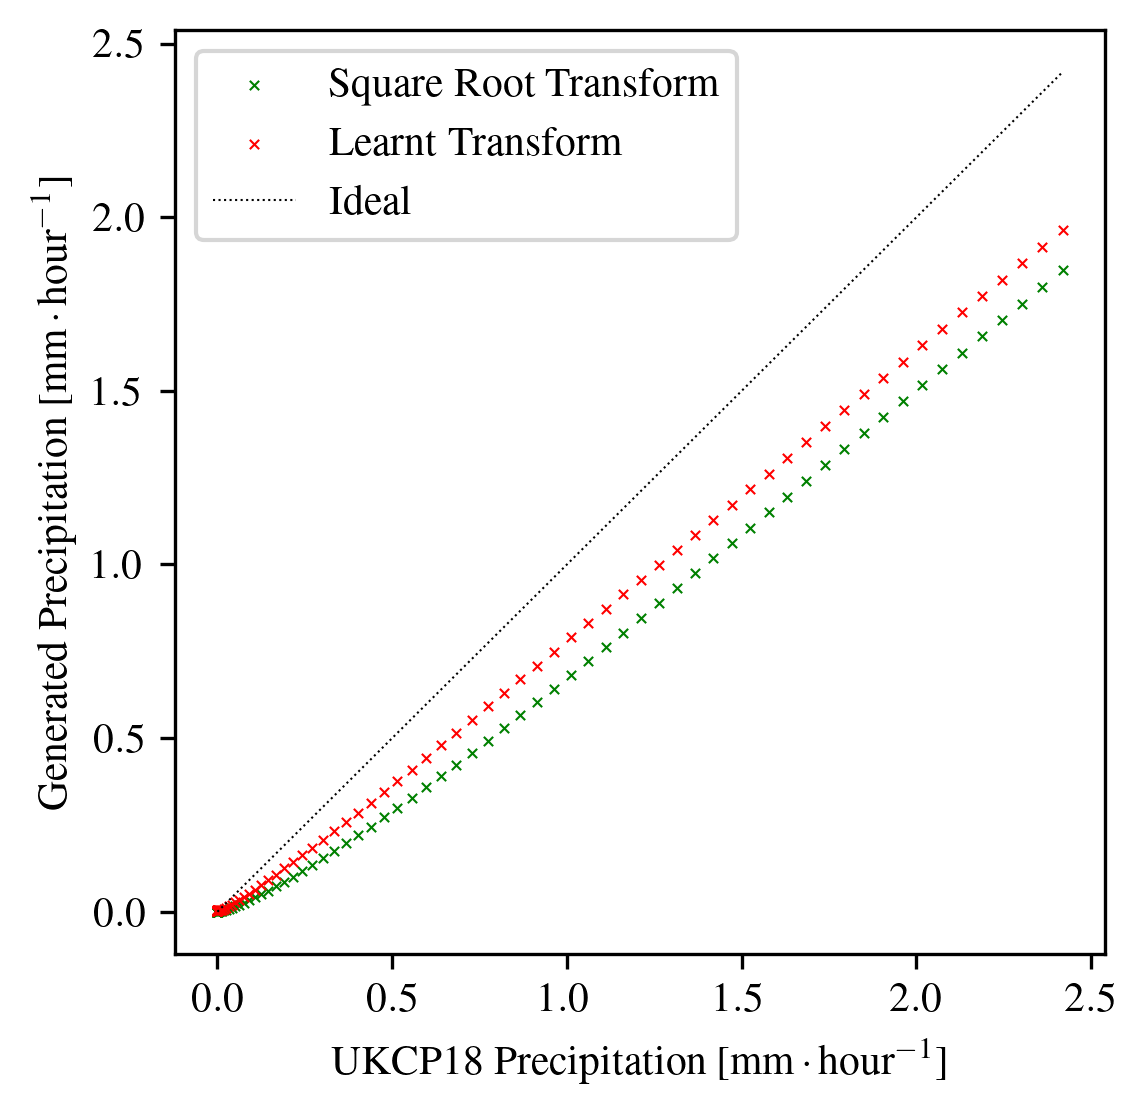

In [6]:
test = xr.open_dataset("test.nc").pr.values
samples_sqrt = torch.load(f"samples_sqrt.pt", map_location=torch.device('cpu')).numpy()
samples_transform = torch.load(f"samples_transform_0.1.pt", map_location=torch.device('cpu')).numpy()

test_cells_sorted = torch.load("test_flattened_sorted.pt").numpy()
samples_sqrt_cells_sorted = np.sort(samples_sqrt.flatten())
samples_transform_cells_sorted = np.sort(samples_transform.flatten())

# desired_quantiles = 1 - np.geomspace(1, 0.0000001, 100)
desired_quantiles = 1 - np.geomspace(1, 0.01, 100)

test_cells_quantiles = get_quantiles(test_cells_sorted, desired_quantiles)
samples_sqrt_cells_quantiles = get_quantiles(samples_sqrt_cells_sorted, desired_quantiles)
samples_transform_cells_quantiles = get_quantiles(samples_transform_cells_sorted, desired_quantiles)

plt.figure(figsize=(4, 4))
plt.scatter(test_cells_quantiles, samples_sqrt_cells_quantiles, marker = 'x', s = 5, linewidth = 0.5, label = "Square Root Transform", c = "green")
plt.scatter(test_cells_quantiles, samples_transform_cells_quantiles, marker = 'x', s = 5, linewidth = 0.5, label = "Learnt Transform", c = "red")
plt.plot(test_cells_quantiles, test_cells_quantiles, linewidth = 0.5, linestyle=":", c = "black", label = "Ideal")
plt.legend()

plt.xlabel('UKCP18 Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Generated Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')

plt.savefig("examples/qq.png", bbox_inches='tight', pad_inches=0.02)
plt.show()

In [7]:
print(1 - np.geomspace(1, 0.0000001, 100))
print(1 - np.geomspace(1, 0.01, 100))

[0.         0.15024656 0.2779191  0.38640927 0.47859917 0.55693785
 0.62350642 0.68007329 0.72814118 0.76898703 0.80369593 0.83318995
 0.85825258 0.87954965 0.8976469  0.9130251  0.92609278 0.93719709
 0.94663301 0.95465121 0.96146471 0.96725451 0.97217441 0.97635511
 0.97990767 0.98292647 0.98549171 0.98767153 0.98952384 0.99109785
 0.99243537 0.99357193 0.99453772 0.99535841 0.99605579 0.9966484
 0.99715196 0.99757987 0.99794349 0.99825247 0.99851503 0.99873814
 0.99892773 0.99908884 0.99922574 0.99934207 0.99944092 0.99952492
 0.9995963  0.99965695 0.99970849 0.99975229 0.99978951 0.99982114
 0.99984801 0.99987085 0.99989025 0.99990674 0.99992075 0.99993266
 0.99994278 0.99995137 0.99995868 0.99996489 0.99997016 0.99997465
 0.99997846 0.99998169 0.99998444 0.99998678 0.99998877 0.99999045
 0.99999189 0.99999311 0.99999414 0.99999502 0.99999577 0.99999641
 0.99999695 0.9999974  0.99999779 0.99999813 0.99999841 0.99999865
 0.99999885 0.99999902 0.99999917 0.99999929 0.9999994  0.99999